# Повышение эффективности рекламного бюджета Проекта 

## Цель проекта

Исследовать возможность повышения эффективности проекта за счет изменения размера и структуры рекламного бюджета. 



## Задачи

1.	Провести предварительный анализ данных, выявить направления работ по повышению их качества;
2.	В случае необходимости, провести предобработку данных;
3.	Построить метрики – пользовательские, электронной коммерции, маркетинговые;
4.	Определить эффективные и неэффективные статьи рекламного бюджета, перспективные группы клиентов;
5.	Дать рекомендации по повышению эффективности маркетинга.



## Бизнес-гипотеза

При сохранении текущего уровня бюджета маркетинга, можно существенно увеличить его эффективность.




## Описание данных

visits_log.csv
1.	Uid — уникальный идентификатор пользователя,
2.	Device — категория устройства пользователя,
3.	Start Ts — дата и время начала сессии,
4.	End Ts — дата и время окончания сессии,
5.	Source Id — идентификатор источника перехода на сайт

orders_log.csv
1.	Uid — уникальный идентификатор пользователя,
2.	Buy Ts — дата и время заказа,
3.	Revenue — сумма заказа.

costs.csv
1.	source_id — идентификатор рекламного источника,
2.	dt — дата проведения рекламной кампании,
3.	costs — расходы на эту кампанию







## Предварительный анализ данных

### Загрузка библиотек и данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# visits = Данные Яндекс Практикум 
# orders = 
# costs = 


### Предварительный анализ данных

In [4]:
# консолидация исследовательких функций
def glance_down(df):
    display(df)
    df.info()
    display(df.describe())
    display(df.isnull().sum())
    print ('Дубликатов в таблице:', df.duplicated().sum())
    print(df.columns)

In [5]:
glance_down(visits)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Дубликатов в таблице: 0
Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')


Все столбцы с заглавными буквами, надо перевести в строчные. 

'End Ts', 'Source Id', 'Start Ts' - состоят из двух отдельных слов, надо объединить в одно. 

'End Ts', 'Start Ts' - привести к типу datetime.




In [6]:
glance_down(orders)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Дубликатов в таблице: 0
Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')


Все столбцы с заглавными буквами, надо перевести в строчные. 

'Buy Ts' - состоит из двух отдельных слов, надо объединить в одно. 

'Buy Ts' - привести к типу datetime.




In [7]:
glance_down(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


source_id    0
dt           0
costs        0
dtype: int64

Дубликатов в таблице: 0
Index(['source_id', 'dt', 'costs'], dtype='object')


dt привести к типу datetime

### Предварительный анализ данных - выводы

Датасет  visits
1.	все столбцы с заглавными буквами, надо перевести в строчные;
2.	'End Ts', 'Source Id', 'Start Ts' - состоят из двух отдельных слов, надо объединить в одно;
3.	'End Ts', 'Start Ts' - привести к типу datetime.

Датасет orders 
1.	все столбцы с заглавными буквами, надо перевести в строчные;
2.	'Buy Ts' - состоит из двух отдельных слов, надо объединить в одно;
3.	'Buy Ts' - привести к типу datetime.

Датасет costs - dt привести к типу datetime.





## Подготовка данных

### Названия столбцов

In [8]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [9]:
orders.columns = ['buy_ts', 'revenue', 'uid']

### Приведение к временному формату 

In [10]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

costs['dt'] = pd.to_datetime(costs['dt'])
    


### Результаты подготовки данных

In [11]:
visits.info()
print()
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Данные подготовлены, можно приступать к анализу. 

## Продуктовые метрики

### DAU, WAU и MAU

Буду сохранять исходные и, когда надо, промежуточные датасеты чтобы не запутаться (уже несколько раз запутывался).

In [16]:
visits_1 = visits.copy()


#### DAU

In [17]:
visits_1['session_year'] = visits_1['start_ts'].dt.year

visits_1['session_date'] = visits_1['start_ts'].dt.date

In [21]:
visits_1['session_month'] = visits_1['start_ts'].astype('datetime64[M]')


visits_1['session_week'] = visits_1['start_ts'].astype('datetime64[W]')

In [22]:
display(visits_1.head())

,device,end_ts,source_id,start_ts,uid,session_year,session_date,test_monday,session_month,session_week
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-20,2017-12-18 17:20:00,2017-12-01,2017-12-14
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-15
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-26 01:54:00,2017-07-01,2017-06-29
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-20,2018-05-14 10:59:00,2018-05-01,2018-05-17
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-27,2017-12-25 14:06:00,2017-12-01,2017-12-21


In [23]:
dau_total = visits_1.groupby('session_date').agg({'uid': 'nunique'}).mean()

In [24]:
print('Среднее значение DAU за весь период:', int(dau_total))



Среднее значение DAU за весь период: 907


In [25]:
dau = visits_1.groupby('session_date').agg({'uid': 'nunique'})

In [26]:
# Относительно красивая столбчатая диаграмма
def time_trend(df, list):
    
    
    
    title_name = list[0]
    yy = list[1]
    y_name = list[2]
    x_name = list[3]
    
    
    df.plot(kind ='bar', y = yy, grid = True, title = title_name, figsize=(12, 5))
    plt.ylabel(y_name)
    plt.xlabel(x_name)
    plt.xticks([])

In [27]:
list_dau = ['DAU. Июнь 2017 -  конец мая 2018.', 'uid', 'Количество пользователей за день', 'Дни']

In [28]:
#time_trend(dau, list_dau)

Интересно посмотреть на пики посещаемости. 

In [29]:
dau[dau['uid'] > 1600]

,uid
session_date,
2017-11-16,1604
2017-11-24,3319
2017-11-25,1817
2018-02-01,1640
2018-03-26,1609
2018-05-31,1997


Нояюрь - это "Черная Пятница".

31 мая 2018 года — Всемирный день блондинок. 

Февраль и март - время для подарков ( 14.02, 23.02, 8.03).

В целом, посещаемость не растет.   Зимой- осеню была больше, в теплые месяцы – меньше.  Причиной может быть сезонность ( а может и не быть).

#### WAU

In [30]:
wau_total = (
    visits_1.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    .mean()
)


In [31]:
print('Среднее значение WAU за весь период:', int(wau_total))

Среднее значение WAU за весь период: 5621


In [32]:
wau = (
    visits_1.groupby(['session_year', 'session_week'])
    .agg({'uid': 'nunique'})
    )

In [33]:
list_wau = ['WAU. Июнь 2017 -  конец мая 2018.', 'uid', 'Количество пользователей за неделю', 'Недели']

In [34]:
#time_trend(wau, list_wau)

In [35]:
wau[wau['uid'] > 10000]

,,uid
session_year,session_week,
2017,2017-11-23,10716


Подтверждается картина DAY – всплеск в “Черную Пятницу”. Блондинки уже не так видны. Снижение посещений в 2018 году. 

#### MAU

In [36]:
mau_total = (
    visits_1.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    .mean()
)


In [37]:
print('Среднее значение MAU за весь период:', int(mau_total))

Среднее значение MAU за весь период: 23228


In [38]:
mau = (
    visits_1.groupby(['session_year', 'session_month'])
    .agg({'uid': 'nunique'})
    )

In [39]:
list_mau = ['MAU. Июнь 2017 -  конец мая 2018.', 'uid', 'Количество пользователей за месяц', 'Месяцы']

In [40]:
#time_trend(mau, list_mau)

 Рост посещений с пиком в ноябре 2017, затем планомерное снижение. 

#### Выводы 

Количество посещений точно не растет. В зависимости от того, имеет ли место сезонный фактор , тренд посещаемости можно описать или как ‘’боковой”  или “падающий”. 

С учетом того, что у нас есть рекламный бюджет, можно сказать, что мы инвестируем деньги либо в удержание уровня посещаемости, либо замедление его падения.  Это точно не  Рамблер Афиша?. 



Text(0.5, 0, 'Дни')

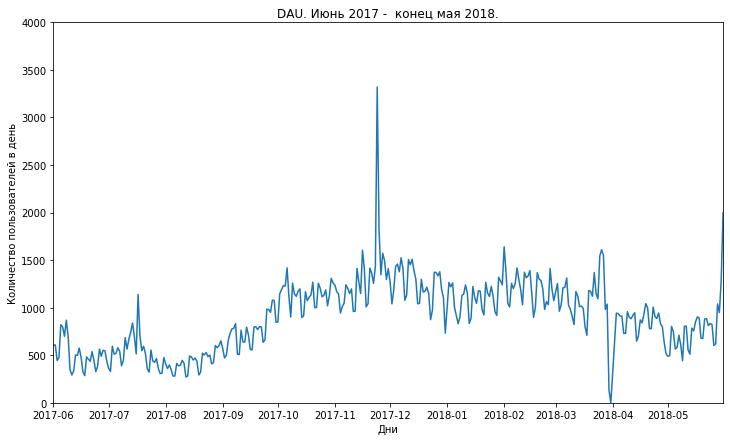

In [41]:
dau.plot(title = 'DAU. Июнь 2017 -  конец мая 2018.',ylim=(0, 4000),  legend=None,  figsize=(12, 7))
plt.ylabel('Количество пользователей в день')
plt.xlabel('Дни')

In [42]:
dau[dau['uid'] < 200]

,uid
session_date,
2018-03-30,131
2018-03-31,1


Международный день резервного копирования?

In [43]:
wau = wau.reset_index()

In [44]:
wau['session_week'] = \
 wau['session_week'].apply(lambda x: x.strftime('%Y-%m'))

In [45]:
wau = wau.set_index('session_week')

Text(0.5, 0, 'Недели')

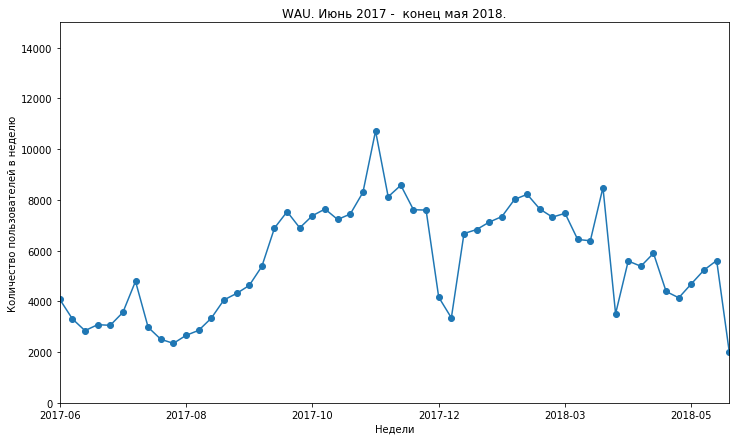

In [46]:
wau.plot(y='uid', title = 'WAU. Июнь 2017 -  конец мая 2018.', legend=None, style='o-', ylim=(0, 15000), figsize=(12, 7))
plt.ylabel('Количество пользователей в неделю')
plt.xlabel('Недели')

In [47]:
mau = mau.reset_index()

In [48]:
mau['session_month'] = \
 mau['session_month'].apply(lambda x: x.strftime('%Y-%m'))

In [49]:
mau = mau.set_index('session_month')

Text(0.5, 0, 'Месяцы')

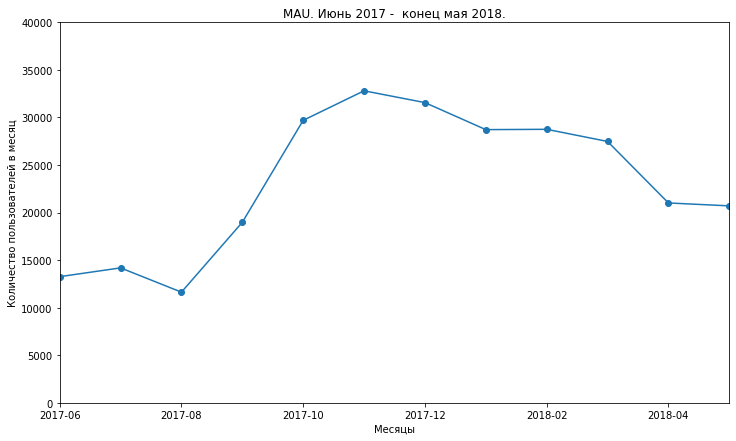

In [50]:
mau.plot(y='uid', title = 'MAU. Июнь 2017 -  конец мая 2018.', legend=None, style='o-', ylim=(0, 40000), figsize=(12, 7))
plt.ylabel('Количество пользователей в месяц')
plt.xlabel('Месяцы')

###  Среднее количество посещений сайта  одним пользователем за день

In [51]:
visits_per_user  = visits_1.groupby('session_date').agg({'uid': ['count', 'nunique']})

visits_per_user.columns = ['n_sessions', 'n_users']
visits_per_user['sessions_per_user'] = (( visits_per_user['n_sessions'] / visits_per_user['n_users'])).round(2)




In [52]:
sessions_per_user_mean = visits_per_user['sessions_per_user'].mean()

In [53]:
print('Среднее количество посещений одним пользователем сайта  за день:', sessions_per_user_mean.round(2))

Среднее количество посещений одним пользователем сайта  за день: 1.08


In [54]:
list_session_p_u_mean = ['Среднее количество посещений одним пользователем сайта за день. \
    Июнь 2017 -  конец мая 2018.', 'sessions_per_user', 'Количество посещений за день', 'Дни']

In [55]:
#time_trend(visits_per_user, list_session_p_u_mean)

За весь исследуемый период мало кто заходил на сайт больше 1 раза в день, даже в “Черную Пятницу”.

<div class="alert alert-block alert-info">
<font size="5"><b>Строю линейный график среднего количества посещений </b></font>

Text(0.5, 0, 'Дни')

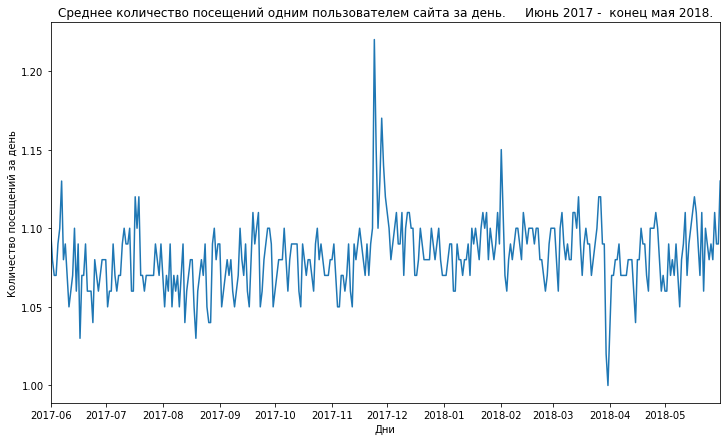

In [56]:
visits_per_user.plot(y='sessions_per_user', title = 'Среднее количество посещений одним пользователем сайта за день. \
    Июнь 2017 -  конец мая 2018.', legend=None, figsize=(12, 7))
plt.ylabel('Количество посещений за день')
plt.xlabel('Дни')

In [57]:
visits_per_user[visits_per_user['sessions_per_user'] < 1.01]

,n_sessions,n_users,sessions_per_user
session_date,,,
2018-03-31,1,1,1.0


Международный день резервного копирования?

###  Продолжительность типичной пользовательской сессии

In [58]:
visits_1['session_duration_sec'] = ( visits_1['end_ts'] - visits_1['start_ts']).dt.seconds


In [59]:
display(visits_1.head())

,device,end_ts,source_id,start_ts,uid,session_year,session_date,test_monday,session_month,session_week,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-20,2017-12-18 17:20:00,2017-12-01,2017-12-14,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-15,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-26 01:54:00,2017-07-01,2017-06-29,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-20,2018-05-14 10:59:00,2018-05-01,2018-05-17,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-27,2017-12-25 14:06:00,2017-12-01,2017-12-21,0


In [60]:
# автоматическое построение гистограмм.
def ak47_hist(df,row):
    
    column = row[0]
    title = row[1]
    x = row[2]
    y = row[3]
    
    boreder_q = np.quantile(df[column], q = [0.25, 0.75]) #границы 1 и 4 квантилей 
    boreder_dev = np.std(df[column], ddof=1) #квадрат стандартного отклонения  
    border_std = np.sqrt(boreder_dev) #стандартное отклонение  
    border_low = boreder_q[0]-3*border_std # левая граница
    border_up = boreder_q[1]+3*border_std #правая граница
    
    
    border_low_cor = max(0, border_low)

   
    
    plt.figure(figsize=(12,5))
    df[column].hist(bins = 50, range = (border_low_cor, border_up))
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    
    
    

In [61]:
list_session_duration_sec = ['session_duration_sec', 'Распределение по продолжительности сессии', \
                             'Продолжительность сессии, сек.', 'Количество сессий']

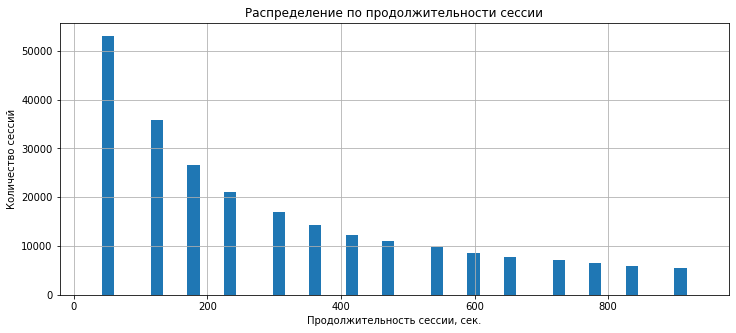

In [62]:
ak47_hist(visits_1,list_session_duration_sec)

Построенная гистограмма показывает, что распределение совсем не похоже на нормальное. Для такой формы распределения  ( очень длинный правый хвост) “типичное” значение не среднее или медиана, а мода. 

Пробелы между столбцами связанны с тем, что мы считаем время визита в секундах, а данные в датасете, реально округлены до минут. Т.е. 60, 120, 180 секунд и т.д. Что на графике и видно.


In [63]:
asl = visits_1['session_duration_sec'].mode()

In [64]:
display('Продолжительность типичной пользовательской сессии за весь период, сек:', asl)

'Продолжительность типичной пользовательской сессии за весь период, сек:'

0    60
dtype: int64

Как праивло  заходят на кроткое время ~ 1-3 минуты. 

###  Retention Rate

In [65]:
first_activity_date = visits_1.groupby(['uid'])['start_ts'].min()

In [66]:
first_activity_date.name = 'first_activity_date'

In [67]:
visits_1 = visits_1.join(first_activity_date,on='uid') 

In [68]:
visits_1['first_activity_month'] = visits_1['first_activity_date'].astype('datetime64[M]')

In [69]:
visits_1['activity_month'] = visits_1['start_ts'].astype('datetime64[M]')

In [70]:
visits_1['cohort_lifetime'] = (visits_1['activity_month'] - visits_1['first_activity_month'])

In [71]:
visits_1['cohort_lifetime'] = visits_1['cohort_lifetime']/np.timedelta64(1, 'M')

In [72]:
visits_1['cohort_lifetime'] = visits_1['cohort_lifetime'].round().astype('int')


In [73]:
display(visits_1)

,device,end_ts,source_id,start_ts,uid,session_year,session_date,test_monday,session_month,session_week,session_duration_sec,first_activity_date,first_activity_month,activity_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-20,2017-12-18 17:20:00,2017-12-01,2017-12-14,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-19,2018-02-19 16:53:00,2018-02-01,2018-02-15,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-26 01:54:00,2017-07-01,2017-06-29,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-20,2018-05-14 10:59:00,2018-05-01,2018-05-17,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-27,2017-12-25 14:06:00,2017-12-01,2017-12-21,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017,2017-07-29,2017-07-24 19:07:00,2017-07-01,2017-07-27,19,2017-07-29 19:07:00,2017-07-01,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018,2018-01-25,2018-01-22 17:38:00,2018-01-01,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018,2018-03-03,2018-02-26 10:12:00,2018-03-01,2018-03-01,19,2018-03-03 10:12:00,2018-03-01,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017,2017-11-02,2017-10-30 10:12:00,2017-11-01,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,2017-11-01,0


In [74]:
cohorts_visits = visits_1.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [75]:
display(cohorts_visits)

,first_activity_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909
...,...,...,...
73,2018-03-01,1,861
74,2018-03-01,2,557
75,2018-04-01,0,15709
76,2018-04-01,1,760


In [76]:
initial_users_count = cohorts_visits[cohorts_visits['cohort_lifetime'] == 0
                                    ][['first_activity_month', 'uid']]


In [77]:
display(initial_users_count)

,first_activity_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [78]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [79]:
cohorts_visits = cohorts_visits.merge(initial_users_count,on='first_activity_month') 

In [80]:
cohorts_visits['retention'] = cohorts_visits['uid']/cohorts_visits['cohort_users']

In [81]:
retention_visits_pivot = cohorts_visits.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 


In [82]:
display(retention_visits_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Чтобы получился красивый график, уберем 1 столбец ( там все равно всегда 100%) и обрежем формат первого месяца жизни когорты до ‘’года и месяца”.

In [83]:
retention_visits_pivot_show = retention_visits_pivot.drop([0], axis = 1)

In [84]:
retention_visits_pivot_show = retention_visits_pivot_show.reset_index()

In [85]:
retention_visits_pivot_show['first_activity_month'] = \
 retention_visits_pivot_show['first_activity_month'].apply(lambda x: x.strftime('%Y-%m'))

In [86]:
retention_visits_pivot_show = retention_visits_pivot_show.set_index('first_activity_month')

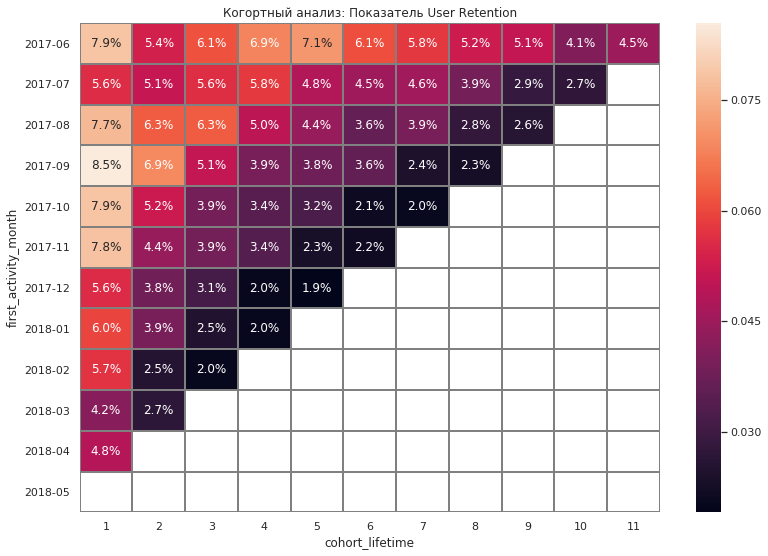

In [87]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когортный анализ: Показатель User Retention')
sns.heatmap(retention_visits_pivot_show, annot=True, fmt='.1%', linewidths=1, linecolor='gray');


Менее 10% пользователей продолжают посещать сайт на второй месяц после первого визита.  Затем, от месяца к месяцу этот показатель продолжает плавно падать еще на 2-3%. 
Лучшие показатели (наименьшее снижение) показывают когорты июня, сентября, октября 2017 г.
Лучшие показатель по темпам снижения ( наименьшие) в среднесрочной перспективе – показывает когорта июня 2017


In [88]:
r_r_1m_mean = retention_visits_pivot[1].mean()

In [89]:
display('Cредний Retention Rate на второй месяц «жизни» когорт, %:', r_r_1m_mean*100)

'Cредний Retention Rate на второй месяц «жизни» когорт, %:'

6.516659710392834

На второй месяц в среднем остается 6,5% пользователей.  

### Продуктовые метрики - выводы

1.	пользователи сайта заходит на него, как правило, не чаще одного раза в день и находиться на нем не более 1-3 минут;
2.	пользователи не очень лояльны к сайту, на второй месяц после первого визита остается в среднем 6,5% пользователей. Далее, в течении нескольких месяцев, этот уровень снижается еще на 2-3%. Для пользователей пришедших в июне, августе, сентябре, октябре,  ноябре 2017 г показатели лучше среднего на ~ 1-2%;
3.	в целом количество посещений сайта снижается с начала 2018 года.  Является ли это сезонным фактором или потерей рынка на данной стадии анализа сказать сложно;
4.	но  инвестиции в рекламу роста точно не обеспечивают. 









## Метрики электронной коммерции

###  Среднее время совершения первой покупки с момента первого посещения сайта

Время первого посещения сайта каждого пользователя уже было определено выше.  Чтобы не запутаться, визуализируем. 

In [90]:
display(first_activity_date.head())

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_activity_date, dtype: datetime64[ns]

In [91]:
first_activity_date = first_activity_date.reset_index()

In [92]:
display(first_activity_date.head())

,uid,first_activity_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Буду сохранять исходные и, когда надо, промежуточные датасеты чтобы не запутаться (уже несколько раз запутывался).

In [93]:
orders_1 = orders.copy()


In [94]:
display(orders_1)

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [95]:
first_order_date = orders_1.groupby(['uid'])['buy_ts'].min().reset_index()

In [96]:
first_order_date.name = 'first_order_date'

In [97]:
display(first_order_date)

,uid,buy_ts
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00
...,...,...
36518,18445147675727495770,2017-11-24 09:03:00
36519,18445407535914413204,2017-09-22 23:55:00
36520,18445601152732270159,2018-03-26 22:54:00
36521,18446156210226471712,2018-02-18 19:34:00


Нас интересуют пользователи, которые и зашли и сделали заказ. Т.е. метод объединения inner

In [98]:
first_order_date_agg = first_order_date.merge(first_activity_date, how='inner')

In [99]:
first_order_date_agg['first_order_period_sec'] = \
( first_order_date_agg['buy_ts'] - first_order_date_agg['first_activity_date']).dt.total_seconds()

In [100]:
first_order_date_agg['first_order_period_h'] =first_order_date_agg['first_order_period_sec']/60


In [101]:
display(first_order_date_agg)

,uid,buy_ts,first_activity_date,first_order_period_sec,first_order_period_h
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,9241320.0,154022.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0,0.0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,4740.0,79.0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,71040.0,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0,0.0
...,...,...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00,8278380.0,137973.0
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,420.0,7.0
36520,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00,19998180.0,333303.0
36521,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,8933580.0,148893.0


In [102]:
first_order_date_s = ['first_order_period_sec', 'Распределение по времени между первым посещением и первым заказом', \
                             'Время между первым посещением и первым заказом, сек.', 'Количество заказов']

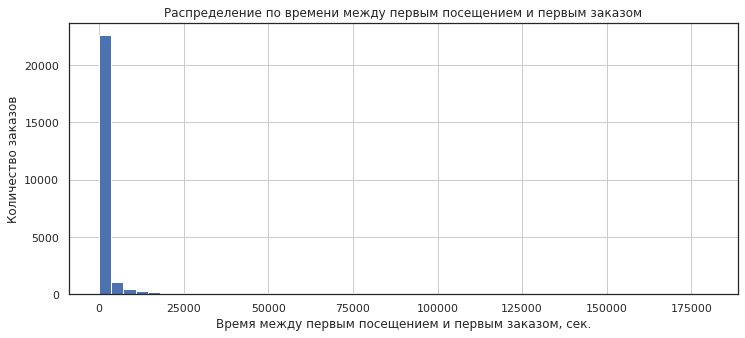

In [103]:
ak47_hist(first_order_date_agg,first_order_date_s )

Построенная гистограмма показывает, что распределение совсем не похоже на нормальное. Для такой формы распределения  ( очень длинный правый хвост) “типичное” значение не среднее или медиана, а мода. 



In [104]:
first_order_date_tip = first_order_date_agg['first_order_period_sec'].mode()

In [105]:
display('Типичный срок между первым посещением и первым заказом, секунд:',first_order_date_tip )

'Типичный срок между первым посещением и первым заказом, секунд:'

0    60.0
dtype: float64

 Те, кто покупает, как правило, делают первую покупку в течении 1 минуты после первого посещения сайта. 

###  Среднее количество покупок на одного покупателя за 6 месяцев

Опять, и не последний раз надо строить когорты. Чтобы не запутаться, лучше использовать один и тот же алгоритм ( который ,ниже еще придется автоматизировать). Едины алгоритм требует единой структуры входных данных. В т.ч. для данного случая   - first_order_date . В предыдущем разделе мы такие данные уже получали, но к сожалению, изменили их структуру в ходе работы.  Что бы не запутаться (уже запутывался), мне проще создать их заново. Такой подход, в случае необходимости будут использовать и далее. 

In [106]:
first_order_date_2= orders_1.groupby(['uid'])['buy_ts'].min()

In [107]:
first_order_date_2.name = 'first_order_date'

In [108]:
display(first_order_date_2.head())

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_order_date, dtype: datetime64[ns]

In [109]:
orders_1 = orders_1.join(first_order_date_2,on='uid') 

In [110]:
display(orders_1.head())

,buy_ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [111]:
orders_1['first_order_month'] = orders_1['first_order_date'].astype('datetime64[M]')

In [112]:
orders_1['activity_month'] = orders_1['buy_ts'].astype('datetime64[M]')

In [113]:
orders_1['cohort_lifetime'] = ( orders_1['activity_month']-orders_1['first_order_month'])

In [114]:
orders_1['cohort_lifetime'] = orders_1['cohort_lifetime']/np.timedelta64(1, 'M')

In [115]:
orders_1['cohort_lifetime'] = orders_1['cohort_lifetime'].round().astype('int')

In [116]:
display(orders_1.head())

,buy_ts,revenue,uid,first_order_date,first_order_month,activity_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,0


In [117]:
orders_number_pivot = orders_1.pivot_table(
    index='first_order_month',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='count',
) 

In [118]:
display(orders_number_pivot)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0
2017-07-01,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,NaN
2017-08-01,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,NaN,NaN
2017-09-01,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,NaN,NaN,NaN
2017-10-01,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,NaN,NaN,NaN,NaN
2017-11-01,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,5052.0,270.0,202.0,179.0,86.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3783.0,224.0,159.0,64.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4095.0,222.0,83.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сумма заказов соответствует сумме заказов в исходном датасете. Все правильно.

Всего один заказ в последней когорте.  Это вообще данные за июнь 2018. А у нас граница анализа ( есть все данные) – май 2018. Затесалось.  Считаю что, в исходном датасете надо оставлять – использовать как тест на корректность при преобразованиях ( не пропало – ничего не потеряли). Избавляться уже на этапе  презентации результатов (графики, таблицы с метриками).

Больше всего покупают в первый месяц жизни когорт. Лидеры – когорты за октябрь – декабрь 2017.  В 2018 году, как и по посещениям, наблюдается спад. 


In [119]:
cohorts_buyers = orders_1.groupby(['first_order_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [120]:
display(cohorts_buyers)

,first_order_month,cohort_lifetime,uid
0,2017-06-01,0,2023
1,2017-06-01,1,61
2,2017-06-01,2,50
3,2017-06-01,3,54
4,2017-06-01,4,88
...,...,...,...
74,2018-03-01,2,58
75,2018-04-01,0,2276
76,2018-04-01,1,69
77,2018-05-01,0,2988


In [121]:
initial_buyers_count = cohorts_buyers[cohorts_buyers['cohort_lifetime'] == 0
                                    ][['first_order_month', 'uid']]

In [122]:
initial_buyers_count = initial_buyers_count.set_index('first_order_month')

In [123]:
display(initial_buyers_count)

,uid
first_order_month,
2017-06-01,2023
2017-07-01,1923
2017-08-01,1370
2017-09-01,2581
2017-10-01,4340
2017-11-01,4081
2017-12-01,4383
2018-01-01,3373
2018-02-01,3651


In [124]:
mean_orders_per_buyer = orders_number_pivot.join(initial_buyers_count,on='first_order_month')  

In [125]:
display(mean_orders_per_buyer)

,0,1,2,3,4,5,6,7,8,9,10,11,uid
first_order_month,,,,,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0,2023
2017-07-01,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,NaN,1923
2017-08-01,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,NaN,NaN,1370
2017-09-01,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,NaN,NaN,NaN,2581
2017-10-01,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,NaN,NaN,NaN,NaN,4340
2017-11-01,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,NaN,NaN,NaN,NaN,NaN,4081
2017-12-01,5052.0,270.0,202.0,179.0,86.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,4383
2018-01-01,3783.0,224.0,159.0,64.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373
2018-02-01,4095.0,222.0,83.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651


Выбираем когорты со сроком жизни не менее 6 месяцев.

In [126]:
mean_orders_per_buyer_6m = mean_orders_per_buyer[~mean_orders_per_buyer[5].isna()]

In [127]:
display(mean_orders_per_buyer_6m)

,0,1,2,3,4,5,6,7,8,9,10,11,uid
first_order_month,,,,,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,276.0,174.0,212.0,153.0,96.0,86.0,2023
2017-07-01,2186.0,100.0,120.0,104.0,72.0,82.0,61.0,50.0,58.0,24.0,53.0,NaN,1923
2017-08-01,1533.0,108.0,100.0,81.0,85.0,62.0,49.0,78.0,46.0,46.0,NaN,NaN,1370
2017-09-01,2933.0,219.0,161.0,164.0,67.0,109.0,108.0,56.0,61.0,NaN,NaN,NaN,2581
2017-10-01,4964.0,314.0,162.0,122.0,129.0,103.0,86.0,125.0,NaN,NaN,NaN,NaN,4340
2017-11-01,4813.0,397.0,182.0,211.0,136.0,59.0,102.0,NaN,NaN,NaN,NaN,NaN,4081
2017-12-01,5052.0,270.0,202.0,179.0,86.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,4383


Оставляем данные по только первым 6 месяцам их жизни. 

In [128]:
mean_orders_per_buyer_6m = mean_orders_per_buyer_6m.drop([6, 7, 8, 9, 10, 11], axis = 1)

In [129]:
display(mean_orders_per_buyer_6m)

,0,1,2,3,4,5,uid
first_order_month,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,2023
2017-07-01,2186.0,100.0,120.0,104.0,72.0,82.0,1923
2017-08-01,1533.0,108.0,100.0,81.0,85.0,62.0,1370
2017-09-01,2933.0,219.0,161.0,164.0,67.0,109.0,2581
2017-10-01,4964.0,314.0,162.0,122.0,129.0,103.0,4340
2017-11-01,4813.0,397.0,182.0,211.0,136.0,59.0,4081
2017-12-01,5052.0,270.0,202.0,179.0,86.0,105.0,4383


In [130]:
mean_orders_per_buyer_6m['orders_sum'] = mean_orders_per_buyer_6m[0]+mean_orders_per_buyer_6m[1]+ \
mean_orders_per_buyer_6m[2]+mean_orders_per_buyer_6m[3]+mean_orders_per_buyer_6m[4] +mean_orders_per_buyer_6m[5]

In [131]:
display(mean_orders_per_buyer_6m)

,0,1,2,3,4,5,uid,orders_sum
first_order_month,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,2023,3441.0
2017-07-01,2186.0,100.0,120.0,104.0,72.0,82.0,1923,2664.0
2017-08-01,1533.0,108.0,100.0,81.0,85.0,62.0,1370,1969.0
2017-09-01,2933.0,219.0,161.0,164.0,67.0,109.0,2581,3653.0
2017-10-01,4964.0,314.0,162.0,122.0,129.0,103.0,4340,5794.0
2017-11-01,4813.0,397.0,182.0,211.0,136.0,59.0,4081,5798.0
2017-12-01,5052.0,270.0,202.0,179.0,86.0,105.0,4383,5894.0


In [132]:
mean_orders_per_buyer_6m['orders_mean'] = mean_orders_per_buyer_6m['orders_sum']/mean_orders_per_buyer_6m['uid']

In [133]:
display(mean_orders_per_buyer_6m)

,0,1,2,3,4,5,uid,orders_sum,orders_mean
first_order_month,,,,,,,,,
2017-06-01,2354.0,177.0,174.0,226.0,292.0,218.0,2023,3441.0,1.700939
2017-07-01,2186.0,100.0,120.0,104.0,72.0,82.0,1923,2664.0,1.385335
2017-08-01,1533.0,108.0,100.0,81.0,85.0,62.0,1370,1969.0,1.437226
2017-09-01,2933.0,219.0,161.0,164.0,67.0,109.0,2581,3653.0,1.415343
2017-10-01,4964.0,314.0,162.0,122.0,129.0,103.0,4340,5794.0,1.335023
2017-11-01,4813.0,397.0,182.0,211.0,136.0,59.0,4081,5798.0,1.420730
2017-12-01,5052.0,270.0,202.0,179.0,86.0,105.0,4383,5894.0,1.344741


In [134]:
mean_orders_per_buyer_6month= (mean_orders_per_buyer_6m['orders_sum'].sum()/mean_orders_per_buyer_6m['uid'].sum()).round(2)

In [135]:
display('Cреднее количество покупок на одного покупателя за 6 месяцев:', mean_orders_per_buyer_6month)

'Cреднее количество покупок на одного покупателя за 6 месяцев:'

1.41

###  Средний чек

In [148]:
display('Средний чек за весь период анализа, у.е.:', orders_1['revenue'].mean().round(2))

'Средний чек за весь период анализа, у.е.:'

5.0

In [149]:
mean_check_2 = orders_1.groupby('activity_month').agg({'revenue': 'mean'})

In [150]:
display(mean_check_2.round(2))

,revenue
activity_month,
2017-06-01,4.06
2017-07-01,5.31
2017-08-01,4.85
2017-09-01,5.42
2017-10-01,4.93
2017-11-01,4.78
2017-12-01,5.85
2018-01-01,4.11
2018-02-01,4.84


###  LTV

In [151]:
oredrs_2 = orders.copy()

In [152]:
oredrs_2['order_month'] = oredrs_2['buy_ts'].astype('datetime64[M]')

In [153]:
display(oredrs_2)

,buy_ts,revenue,uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01


In [154]:
first_orders = oredrs_2.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']


In [155]:
display(first_orders)

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01
...,...,...
36518,18445147675727495770,2017-11-01
36519,18445407535914413204,2017-09-01
36520,18445601152732270159,2018-03-01
36521,18446156210226471712,2018-02-01


In [156]:
cohort_sizes = (
    first_orders.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_month', 'n_buyers']


In [157]:
display(cohort_sizes)

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [158]:
orders_2_new = oredrs_2.merge(first_orders, on='uid')

In [159]:
display(orders_2_new.head())

,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [160]:
cohorts = (
    orders_2_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)


In [161]:
display(cohorts.head())

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [162]:
report = cohort_sizes.merge(cohorts, on='first_order_month')

In [163]:
display(report.head())

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [164]:
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')


In [165]:
display(report.head())

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


In [166]:
report['ltv'] = report['revenue'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2)


In [167]:
display(output)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,NaN
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,NaN,NaN
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,NaN,NaN,NaN
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,NaN,NaN,NaN,NaN
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,0.29,0.30,0.14,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,0.28,0.08,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Виден наш тестовый маркер - июнь 2018. Значит ничего не потеряли. 

In [168]:
output = output.cumsum(axis=1)

In [169]:
display(output)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08-01,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
output = output.reset_index()

output['first_order_month'] = \
 output['first_order_month'].apply(lambda x: x.strftime('%Y-%m')) 

output = output.set_index('first_order_month')

In [171]:
display(output)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.40,NaN
2017-08,5.28,5.75,6.21,6.60,7.09,7.37,7.58,7.99,8.28,8.47,NaN,NaN
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,NaN,NaN,NaN
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,NaN,NaN,NaN,NaN
2017-11,5.15,5.55,5.75,6.07,6.22,6.27,6.38,NaN,NaN,NaN,NaN,NaN
2017-12,4.74,5.00,5.93,7.00,7.31,7.65,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.14,4.43,4.73,4.87,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.16,4.44,4.52,4.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
output = output[~output[5].isna()]

In [173]:
output = output.drop([6, 7, 8, 9, 10, 11], axis = 1)

In [174]:
display(output)

age,0,1,2,3,4,5
first_order_month,,,,,,
2017-06,4.72,5.21,5.65,6.60,7.62,8.36
2017-07,6.01,6.35,6.97,7.33,7.51,7.67
2017-08,5.28,5.75,6.21,6.60,7.09,7.37
2017-09,5.64,6.76,7.28,11.26,11.66,12.31
2017-10,5.00,5.54,5.73,5.89,6.04,6.16
2017-11,5.15,5.55,5.75,6.07,6.22,6.27
2017-12,4.74,5.00,5.93,7.00,7.31,7.65


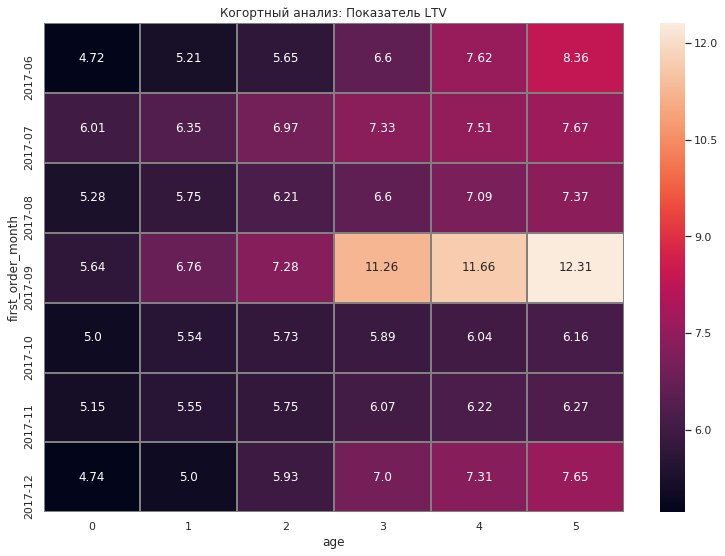

In [175]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когортный анализ: Показатель LTV')
sns.heatmap(output, annot=True, fmt='.4', linewidths=1, linecolor='gray');

Сентябрьская когорта показывает лучшие результаты. И в лидеры опять вернулся  наш бывший фаворит – июнь 2017.  Люди из это когорты сделали еще покупки в декабре, обеспечили соответствующую выручку/валовую прибыль. 

Рассчитаем средний LTV за 6 месяцев жизни когорт. 

In [176]:
output_mean = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round(2)

In [177]:
output_mean = output_mean[~output_mean[5].isna()]

output_mean = output_mean.drop([6, 7, 8, 9, 10, 11], axis = 1)


In [178]:
display(output_mean)

age,0,1,2,3,4,5
first_order_month,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34


In [179]:
output_mean_mean = output_mean.cumsum(axis=1).mean(axis=0).round(2)

In [180]:
output_mean_mean = output_mean_mean.reset_index()

In [181]:
display(output_mean_mean)

,age,0
0,0,5.22
1,1,5.74
2,2,6.22
3,3,7.25
4,4,7.64
5,5,7.97


In [182]:
# относительно симпатичная bar диаграмма 
def picture(df, list):
    
    title = list[0]
    y_name = list[1]
    column_y = list[2]
    column_x = list[3]
    
    plt.figure(figsize=(12,5))

    plt.bar(df[column_y], df[column_x])

    plt.title(title)
    plt.ylabel(y_name)
    plt.grid(axis = 'y')
    

In [183]:
list_mean_mean = ['Динамика среднего LTV -  с 0 до 6 периода жизни когорт', 
              'у.е.', 'age', 0]

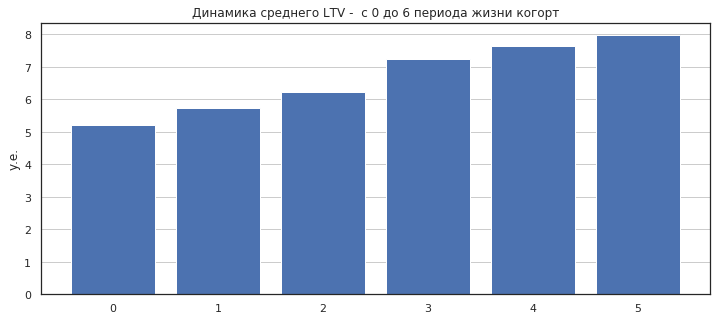

In [184]:
picture(output_mean_mean, list_mean_mean)

За 6 месяцев клиент каждой когорты в среднем приносит 8 у.е. Но такой показатель обеспечен результатами когорты сентября 2017. 

### Метрики электронной коммерции - выводы 


1.	типичный покупатель обычно совершает первую покупку при первом посещении сайта в течении 60 секунд;
2.	за 6 месяцев совершается в среднем 1,4 покупки. Т.е. за второй покупкой типичный покупатель приходит через несколько месяцев после первого посещения сайта;
3.	средний месячный чек ( данные для  расчета – июнь 2017 – май 2018)  составляет 6,14 у.е.;
4.	средний LTV по когортам существующих более 6 периодов за срок 6 периодов существования (месяцев ) составил 8 у.е.







## Маркетинговые метрики

### Общая сумма расходов на маркетинг

In [185]:
costs_1 = costs.copy()

In [186]:
costs_2 = costs.copy()

In [187]:
costs_2['costs_month'] = costs_2['dt'].astype('datetime64[M]')

In [188]:
display(costs_2)

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [189]:
costs_3 = costs_2.copy()

In [190]:
costs_2['costs_month'] = \
costs_2 ['costs_month'].apply(lambda x: x.strftime('%Y-%m'))

In [191]:
display(costs_2)

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05
2538,10,2018-05-28,21.26,2018-05
2539,10,2018-05-29,11.32,2018-05
2540,10,2018-05-30,33.15,2018-05


In [192]:
total_costs = costs_2['costs'].sum().round(2)

In [193]:
display('Расходы на рекламу за весь период анализа, у.е.:',total_costs)

'Расходы на рекламу за весь период анализа, у.е.:'

329131.62

In [194]:
display('Валовая прибыль за весь период анализа, у.е.:', mean_check['revenue'].sum().round(2))

'Валовая прибыль за весь период анализа, у.е.:'

252053.78

In [195]:
display('Валовая прибыль -  Расходы на рекламу, всего у.е.:', (mean_check['revenue'].sum() - total_costs).round(2))

'Валовая прибыль -  Расходы на рекламу, всего у.е.:'

-77077.84

А у нас убыток! Расходы на рекламу превышают валовую прибыль на ~ 30%!!!

In [196]:
costs_grouped_total = costs_2.groupby('costs_month').agg({ 'costs': 'sum'})

In [197]:
display(costs_grouped_total)

,costs
costs_month,
2017-06,18015.00
2017-07,18240.59
2017-08,14790.54
2017-09,24368.91
2017-10,36322.88
2017-11,37907.88
2017-12,38315.35
2018-01,33518.52
2018-02,32723.03


In [198]:
list_total_costs = ['Общие затраты на рекламу по месяцам. Июнь 2017 -  конец мая 2018.', 'costs', 'у.е.', 'Месяцы']

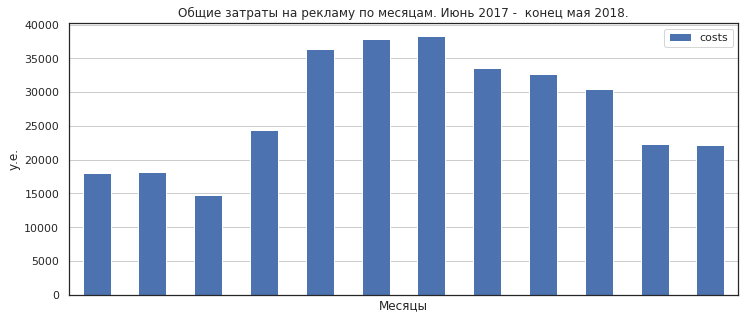

In [199]:
time_trend(costs_grouped_total, list_total_costs)

Расходы на рекламу стали снижать в 2018 году. Но, как мы уже выяснили, валовая прибыль ( посещения, заказы) тоже стали снижаться. Если это была оптимизация, она не сработала!!!

In [200]:
sourses_grouped_total = costs_2.groupby('source_id').agg({ 'costs': 'sum'})

In [201]:
sourses_grouped_total = sourses_grouped_total.reset_index()

In [202]:
display(sourses_grouped_total)

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [203]:
list_sourses_grouped_total = ['Распределение затрат по источникам трафика за весь период', 
              'у.е.', 'source_id', 'costs']


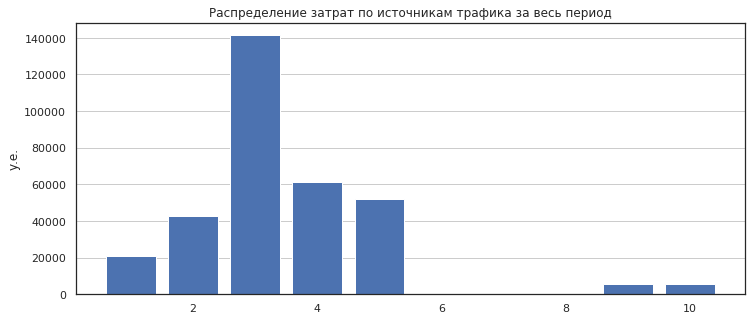

In [204]:
picture(sourses_grouped_total, list_sourses_grouped_total)

Истоники 6,7,8 - не были задействованы. 
9,10 - в очень малых объемах.

Основные вложения в источник 3.





На тепловой карте посмотрим, как 100% расходов на рекламу распределялись по источникам и по времени за весь период анализа. 

In [205]:
costs_2['costs_share'] = costs_2['costs']/total_costs

In [206]:
display(costs_2)

,source_id,dt,costs,costs_month,costs_share
0,1,2017-06-01,75.20,2017-06,0.000228
1,1,2017-06-02,62.25,2017-06,0.000189
2,1,2017-06-03,36.53,2017-06,0.000111
3,1,2017-06-04,55.00,2017-06,0.000167
4,1,2017-06-05,57.08,2017-06,0.000173
...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05,0.000030
2538,10,2018-05-28,21.26,2018-05,0.000065
2539,10,2018-05-29,11.32,2018-05,0.000034
2540,10,2018-05-30,33.15,2018-05,0.000101


In [207]:
costs_grouped_by_sourses = costs_2.pivot_table(
    index='source_id',
    columns='costs_month',
    values='costs_share',
    aggfunc='sum',
) 


In [208]:
display(costs_grouped_by_sourses)

costs_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
source_id,,,,,,,,,,,,
1,0.003420,0.003260,0.002892,0.004564,0.007036,0.007429,0.007113,0.006642,0.006698,0.005752,0.004033,0.004459
2,0.007375,0.007089,0.005503,0.009071,0.014721,0.015944,0.014881,0.012632,0.013594,0.011980,0.009096,0.008171
3,0.023491,0.023317,0.018666,0.030272,0.047814,0.051728,0.049280,0.044993,0.043231,0.039744,0.028246,0.028595
4,0.010679,0.010724,0.009775,0.015776,0.019508,0.016373,0.023336,0.017722,0.017355,0.018114,0.013394,0.012804
5,0.007949,0.009109,0.006640,0.011695,0.017523,0.019218,0.017842,0.016320,0.015408,0.013762,0.010638,0.011149
9,0.000867,0.000919,0.000756,0.001263,0.001852,0.002076,0.001999,0.001662,0.001676,0.001459,0.001135,0.001100
10,0.000955,0.001002,0.000707,0.001400,0.001906,0.002407,0.001962,0.001867,0.001461,0.001599,0.001180,0.001245


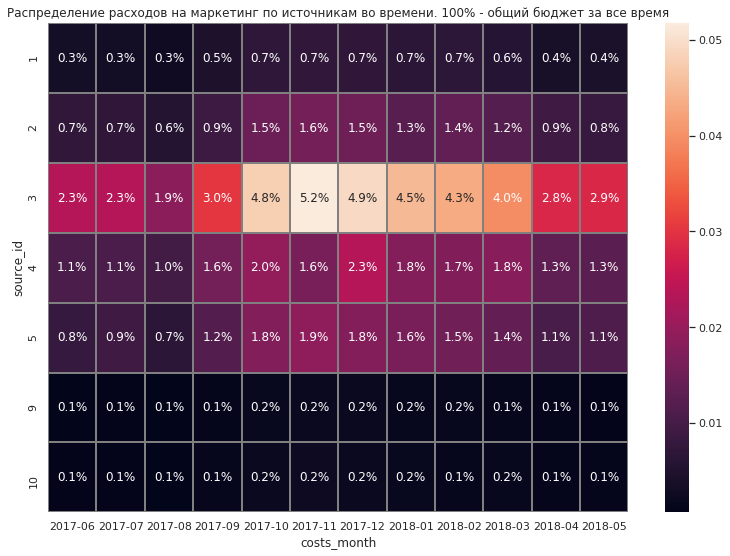

In [209]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Распределение расходов на маркетинг по источникам во времени. 100% - общий бюджет за все время')
sns.heatmap(costs_grouped_by_sourses, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

На источник 3 всегда направляли больше средств. Когда началась оптимизация, расходы стали снижать по всем источникам примерно одинаково. 

 


### CAC

####  Средний CAC на одного покупателя 

Для расчетов будем использовать уже полученный выше промежуточный резульат.

In [210]:
display(cohort_sizes)

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Только удалим наши ненужные/ тестовые данные за июль 2018.

In [211]:
cohort_sizes_2 = cohort_sizes.query('n_buyers != 1')

In [212]:
cohort_sizes_2['first_order_month'] = \
 cohort_sizes_2['first_order_month'].apply(lambda x: x.strftime('%Y-%m'))

In [213]:
display(cohort_sizes_2)

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


Этот промежуточный результат мы тоже получали выше.

In [214]:
display(costs_grouped_total)

,costs
costs_month,
2017-06,18015.00
2017-07,18240.59
2017-08,14790.54
2017-09,24368.91
2017-10,36322.88
2017-11,37907.88
2017-12,38315.35
2018-01,33518.52
2018-02,32723.03


In [215]:
cac_total_by_month = costs_grouped_total.copy()

In [216]:
cac_total_by_month = cac_total_by_month.reset_index()

In [217]:
display(cac_total_by_month) 

,costs_month,costs
0,2017-06,18015.00
1,2017-07,18240.59
2,2017-08,14790.54
3,2017-09,24368.91
4,2017-10,36322.88
5,2017-11,37907.88
6,2017-12,38315.35
7,2018-01,33518.52
8,2018-02,32723.03
9,2018-03,30415.27


In [218]:
cac_total_by_month = cac_total_by_month.merge(cohort_sizes_2, left_on='costs_month', right_on='first_order_month')

In [219]:
display(cac_total_by_month)

,costs_month,costs,first_order_month,n_buyers
0,2017-06,18015.00,2017-06,2023
1,2017-07,18240.59,2017-07,1923
2,2017-08,14790.54,2017-08,1370
3,2017-09,24368.91,2017-09,2581
4,2017-10,36322.88,2017-10,4340
5,2017-11,37907.88,2017-11,4081
6,2017-12,38315.35,2017-12,4383
7,2018-01,33518.52,2018-01,3373
8,2018-02,32723.03,2018-02,3651
9,2018-03,30415.27,2018-03,3533


In [220]:
cac_total_by_month['cac'] = (cac_total_by_month['costs']/cac_total_by_month['n_buyers']).round(2)

In [221]:
display(cac_total_by_month)

,costs_month,costs,first_order_month,n_buyers,cac
0,2017-06,18015.00,2017-06,2023,8.91
1,2017-07,18240.59,2017-07,1923,9.49
2,2017-08,14790.54,2017-08,1370,10.80
3,2017-09,24368.91,2017-09,2581,9.44
4,2017-10,36322.88,2017-10,4340,8.37
5,2017-11,37907.88,2017-11,4081,9.29
6,2017-12,38315.35,2017-12,4383,8.74
7,2018-01,33518.52,2018-01,3373,9.94
8,2018-02,32723.03,2018-02,3651,8.96
9,2018-03,30415.27,2018-03,3533,8.61


In [222]:
display(cac_total_by_month['cac'].mean().round(2))

9.15

Явно больше среднего чека и среднего LTV!!!  Все тот-же "устойчивый минус" в экономике. 

In [223]:
list_cac_total_by_month = ['CAC по месяцам. Июнь 2017 -  конец мая 2018.', 'cac', 'у.е.', 'Месяцы']

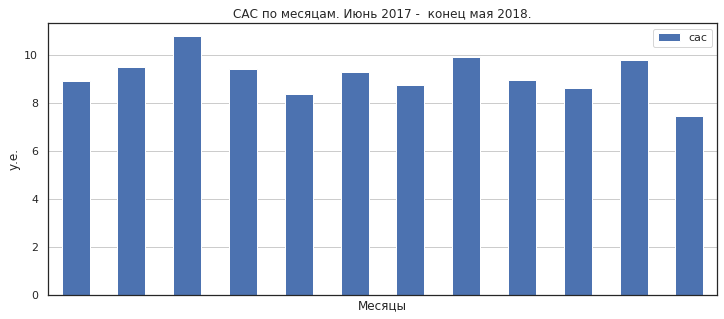

In [224]:
time_trend(cac_total_by_month, list_cac_total_by_month)

Начиная с января 2018 года CAC пытаются снижать, но, как мы знаем, это сопровождается снижением посещений/заказов.  Вполне возможно с этим и связан всплеск в апреле 2018.  Темп снижения посетителей опередил темп снижения расходов на рекламу. Одним словом, оптимизация  - не вариант. 


 #### CAC по источникам  трафика

Данные о источнике трафика есть в сете vivits, их с помощью merge можно передать в orders, а затем уже связывать с source по месяцам. 

Затруднением, однако, является то, что один и тот же посетитель заходит на сайт по разным источникам трафика. Надо выбрать, с каким из них соотносить данные о рекламных затратах. 
Исходя из уже полученных выше результатов ( типичная покупка –  первое посещение), логично  выбирать источник трафика первого посещения. Реализуем через группировку по методу first.


In [225]:
users_one_source = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'})

In [226]:
display(users_one_source)

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5
...,...
18446403737806311543,5
18446424184725333426,4
18446556406699109058,3


Данные по расходам возьмем вот из этого,  уже раннее полученного сета.

In [227]:
display(costs_3)

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [228]:
costs_by_month_sourses = costs_3.groupby(['costs_month', 'source_id']).agg({'costs': 'sum'})

In [229]:
display(costs_by_month_sourses)

costs
costs_month source_id         
2017-06-01  1          1125.61
            2          2427.38
            3          7731.65
            4          3514.80
            5          2616.12
...                        ...
2018-05-01  3          9411.42
            4          4214.21
            5          3669.56
            9           362.17
            10          409.86

[84 rows x 1 columns]

In [230]:
 orders_by_sources = orders.merge(users_one_source, on = 'uid', how = 'left')

In [231]:
display(orders_by_sources)

,buy_ts,revenue,uid,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,3
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,3


In [232]:
first_order_date_3= orders_by_sources.groupby(['uid'])['buy_ts'].min()

In [233]:
first_order_date_3.name = 'first_order_date'

In [234]:
orders_by_sources = orders_by_sources.join(first_order_date_3,on='uid')

In [235]:
orders_by_sources['costs_month'] = orders_by_sources['first_order_date'].astype('datetime64[M]')

In [236]:
orders_by_sources_2 = orders_by_sources.copy()

In [237]:
display(orders_by_sources)

,buy_ts,revenue,uid,source_id,first_order_date,costs_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:58:00,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,4,2018-05-31 23:50:00,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,10,2018-05-31 23:50:00,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,3,2018-05-31 23:54:00,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,3,2018-05-31 23:56:00,2018-05-01


In [238]:
orders_by_month_sourses = orders_by_sources.groupby(['costs_month', 'source_id']).agg({'uid': 'nunique'})

In [239]:
display(orders_by_month_sourses)

uid
costs_month source_id     
2017-06-01  1          190
            2          235
            3          638
            4          413
            5          384
...                    ...
2018-05-01  4          804
            5          497
            9           60
            10         130
2018-06-01  4            1

[86 rows x 1 columns]

In [240]:
costs_by_month_sourses =costs_by_month_sourses.reset_index() 

In [241]:
orders_by_month_sourses = orders_by_month_sourses.reset_index()

In [242]:
display(costs_by_month_sourses)

,costs_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


In [243]:
display(orders_by_month_sourses)

,costs_month,source_id,uid
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
81,2018-05-01,4,804
82,2018-05-01,5,497
83,2018-05-01,9,60
84,2018-05-01,10,130


Интересное наблюдение. В  сете содержащем сгруппированные по месяцам и источникам трафика количество новых клиентов на 2 строки больше, чем в  сете где сгруппированы затраты. 

С одной лишне  строкой понятно  - это наши любимые данные за июнь 2018. Со второй стоит разораться. 


In [244]:
orders_by_month_sourses['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10,  7])

In [245]:
costs_by_month_sourses['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

В orders лишний источник трафика - №7. Клиенты прошли из источника за который мы не платили. Дело хорошее, но CAC нулевой. Ничего, все спишет merge!

In [246]:
cac_by_month_sourses = \
costs_by_month_sourses.merge(orders_by_month_sourses, on = ['costs_month', 'source_id'], how = 'left')

In [247]:
display(cac_by_month_sourses)

,costs_month,source_id,costs,uid
0,2017-06-01,1,1125.61,190
1,2017-06-01,2,2427.38,235
2,2017-06-01,3,7731.65,638
3,2017-06-01,4,3514.80,413
4,2017-06-01,5,2616.12,384
...,...,...,...,...
79,2018-05-01,3,9411.42,844
80,2018-05-01,4,4214.21,804
81,2018-05-01,5,3669.56,497
82,2018-05-01,9,362.17,60


In [248]:
cac_by_month_sourses['cac'] = (cac_by_month_sourses['costs']/cac_by_month_sourses['uid']).round(2)

In [249]:
display(cac_by_month_sourses)

,costs_month,source_id,costs,uid,cac
0,2017-06-01,1,1125.61,190,5.92
1,2017-06-01,2,2427.38,235,10.33
2,2017-06-01,3,7731.65,638,12.12
3,2017-06-01,4,3514.80,413,8.51
4,2017-06-01,5,2616.12,384,6.81
...,...,...,...,...,...
79,2018-05-01,3,9411.42,844,11.15
80,2018-05-01,4,4214.21,804,5.24
81,2018-05-01,5,3669.56,497,7.38
82,2018-05-01,9,362.17,60,6.04


In [250]:


cac_by_month_sourses['costs_month'] = cac_by_month_sourses['costs_month'].apply(lambda x: x.strftime('%Y-%m')) 



In [251]:
cac_by_month_sourses_mean = cac_by_month_sourses.groupby('source_id').agg({'cac': 'mean'}).reset_index()

In [252]:
display(cac_by_month_sourses_mean)

,source_id,cac
0,1,7.213333
1,2,12.505000
2,3,13.803333
3,4,6.440000
4,5,7.452500
5,9,5.415000
6,10,4.868333


In [253]:
list_cac_by_month_sourses_mean= ['Средний CAC для каждого источника трафика', 
              'у.е./клиент', 'source_id', 'cac']

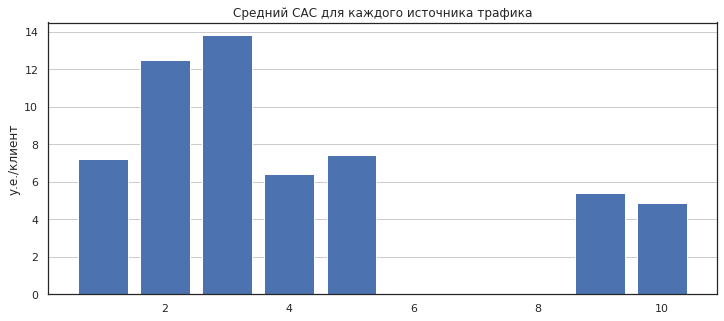

In [254]:
picture(cac_by_month_sourses_mean, list_cac_by_month_sourses_mean)

Посмотрим, как вся сумма ( за весь период) расходов на маркетинг (100%) распределялась по времени и источникам. 

In [255]:
cac_by_month_sourses_map = cac_by_month_sourses.pivot_table(
    index='source_id',
    columns='costs_month',
    values='cac',
    ).round(2)

In [256]:
display(cac_by_month_sourses_map)

costs_month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
source_id,,,,,,,,,,,,
1,5.92,6.71,8.42,6.62,6.81,7.55,7.07,9.19,8.02,6.74,7.42,6.09
2,10.33,11.22,14.72,13.51,12.23,13.19,12.86,14.24,15.27,11.70,14.26,6.53
3,12.12,14.99,18.23,12.76,13.66,14.00,12.32,14.72,13.03,13.64,15.02,11.15
4,8.51,6.83,9.52,8.80,5.48,4.58,5.58,5.65,5.16,5.52,6.41,5.24
5,6.81,7.09,6.07,6.54,6.10,9.13,7.62,8.49,7.48,8.58,8.14,7.38
9,4.19,5.82,4.08,4.78,4.84,4.71,5.44,6.84,6.57,2.98,8.69,6.04
10,3.31,6.47,6.29,5.36,3.00,6.19,7.60,6.68,3.91,2.83,3.63,3.15


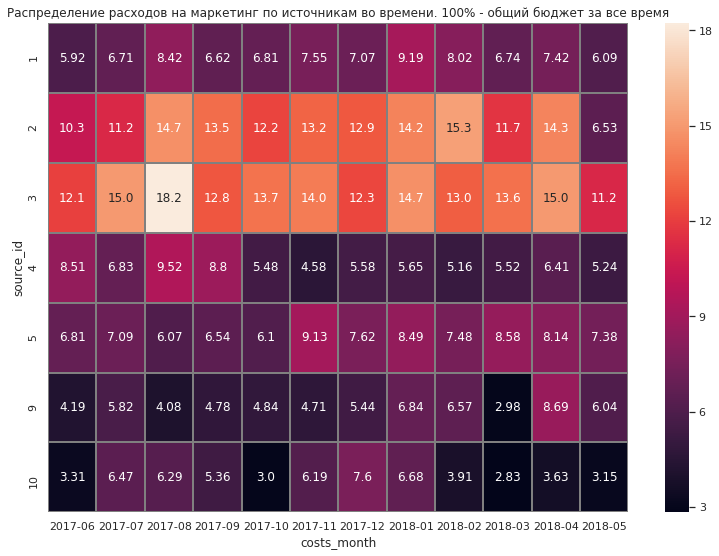

In [257]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Распределение расходов на маркетинг по источникам во времени. 100% - общий бюджет за все время')
sns.heatmap(cac_by_month_sourses_map, annot=True, fmt='.3', linewidths=1, linecolor='gray');

Источники 2 и  3 выглядят  очень подозрительно. Получаемые от них  клиенты очень дорогие, а, как было показано выше, именно на источник 3   мы направили большую часть бюджета.  

Может, существуют возможности для эффективного перераспределения рекламного бюджета?!?





### ROMI

Правило ранжирования  источников,  по перспективности (небольшой такой неформальный тендер):
1.	только  ROI больше единицы;
2.	чем быстрее показатель превысил единицу, тем лучше;
3.	чем выше LTV, тем лучше. 


Вот такие, уже ранее полученные сеты, будем использовать для расчета ROMI по источникам. 

In [258]:
display(orders_by_sources)

,buy_ts,revenue,uid,source_id,first_order_date,costs_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:58:00,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,4,2018-05-31 23:50:00,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,10,2018-05-31 23:50:00,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,3,2018-05-31 23:54:00,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,3,2018-05-31 23:56:00,2018-05-01


In [259]:
orders_by_sources['source_id'].unique()

array([ 1,  2,  3,  5,  4,  9, 10,  7])

In [260]:
orders_by_sources['order_month'] = orders_by_sources['buy_ts'].astype('datetime64[M]')

In [261]:
display(costs_3)

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


Такие объемы повторяющихся действий – только автоматизация. 

In [262]:
def ltv_romi(df_1,df_2,row):
    
    source_name = row[0]
    title_1 = row[1]
    title_2 = row[2]
    title_3 = row[3]
    
    
    
    
    
    df1 = df_1[df_1['source_id'] == source_name]
    df2 = df_2[df_2['source_id'] == source_name]
    
    
    # расчеты LTV
    first_orders_df1 = df1.groupby('uid').agg({'order_month': 'min'}).reset_index()
    first_orders_df1.columns = ['uid', 'first_order_month']
    
    cohort_sizes_df1 = (
    first_orders_df1.groupby('first_order_month')
    .agg({'uid': 'nunique'})
    .reset_index()
     )
    cohort_sizes_df1.columns = ['first_order_month', 'n_buyers']
   
    df1_new = df1.merge(first_orders_df1, on='uid')

    cohorts_df1 = (
    df1_new.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
      )
    
    report_df1 = cohort_sizes_df1.merge(cohorts_df1, on='first_order_month')
    
    report_df1['age'] = (
    report_df1['order_month'] - report_df1['first_order_month']
    ) / np.timedelta64(1, 'M')
    report_df1['age'] = report_df1['age'].round().astype('int')
    
    report_df1['ltv'] = (report_df1['revenue'] / report_df1['n_buyers']).round(2)

    output_df1 = report_df1.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
    ).round(2)
    
    output_ltv = output_df1.cumsum(axis=1)
    
    output_ltv = output_ltv.reset_index()
    output_ltv['first_order_month'] = \
    output_ltv['first_order_month'].apply(lambda x: x.strftime('%Y-%m')) 
    output_ltv = output_ltv.set_index('first_order_month')
    
    display('LTV и ROMI по источнику трафика №:', row[0])


    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title(title_1)
    sns.heatmap(output_ltv, annot=True, fmt='.4', linewidths=1, linecolor='gray');
    
    output_df1_mean = report_df1.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
    ).cumsum(axis=1).mean(axis=0)
    
    display('LTV - средняя когорта')
    display(output_df1_mean.round(2))
    
    
    # расчеты ROMI
    costs_grouped_month = df2.groupby('costs_month').agg({ 'costs': 'sum'})
    
    report_df2 = pd.merge(
    report_df1, costs_grouped_month, left_on='first_order_month', right_on='costs_month'
     )
    
    report_df2['cac'] = report_df2['costs'] / report_df2['n_buyers']
    report_df2['romi'] = (report_df2['ltv'] / report_df2['cac']).round(2)
    
    output_roi = report_df2.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).cumsum(axis=1).round(2) 
    
    output_roi = output_roi.reset_index()
    output_roi['first_order_month'] = \
    output_roi['first_order_month'].apply(lambda x: x.strftime('%Y-%m')) 
    output_roi = output_roi.set_index('first_order_month')
    
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title(title_2 )
    sns.heatmap(output_roi, annot=True, fmt='.4', linewidths=1, linecolor='gray');
    
    output_roi_mean = report_df2.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
    ).cumsum(axis=1).mean(axis=0) 
    
    display('ROMI - средняя когорта')
    display(output_roi_mean.round(2))
    
    output_roi_mean = output_roi_mean.reset_index()
    list_output_roi_mean = [title_3, 'у.е. за период', 'age', 0]
    picture(output_roi_mean, list_output_roi_mean)
    
    
   
    
    

    
    

Еще раз вспомним по каким истоникам трафика имеет смысл считать ROMI ( т.к. на ноль делить нельзя).

In [263]:
costs_3['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

Поехали!

In [264]:
list_main = [[1, 'Источник 1. LTV.', 'Источник 1. ROMI.', 'Источник 1. Средний по когортам ROMI по периодам жизни.']\
             ,[2, 'Источник 2. LTV.', 'Источник 2. ROMI.', 'Источник 2. Средний по когортам ROMI по периодам жизни.']\
             ,[3, 'Источник 3. LTV.', 'Источник 3. ROMI.', 'Источник 3. Средний по когортам ROMI по периодам жизни.']\
             , [4, 'Источник 4. LTV.', 'Источник 4. ROMI.', 'Источник 4. Средний по когортам ROMI по периодам жизни.']\
             , [5, 'Источник 5. LTV.', 'Источник 5. ROMI.', 'Источник 5. Средний по когортам ROMI по периодам жизни.']\
             , [9, 'Источник 9. LTV.', 'Источник 9. ROMI.', 'Источник 9. Средний по когортам ROMI по периодам жизни.']
             , [10, 'Источник 10. LTV.', 'Источник 10. ROMI.', 'Источник 10. Средний по когортам ROMI по периодам жизни.']]

In [265]:
import warnings
warnings.filterwarnings('ignore')

'LTV и ROMI по источнику трафика №:'

1

'LTV - средняя когорта'

age
0      6.31
1      7.46
2      8.87
3      9.63
4     10.88
5     12.01
6     13.76
7     15.77
8     19.10
9     23.14
10    26.43
11    33.63
dtype: float64

'ROMI - средняя когорта'

age
0     0.89
1     1.05
2     1.26
3     1.37
4     1.57
5     1.77
6     2.04
7     2.37
8     2.86
9     3.47
10    4.26
11    5.68
dtype: float64

'LTV и ROMI по источнику трафика №:'

2

'LTV - средняя когорта'

age
0      6.50
1      8.13
2      9.98
3     12.09
4     13.80
5     15.49
6     12.83
7     14.06
8     14.95
9     11.38
10    13.78
11    16.65
dtype: float64

'ROMI - средняя когорта'

age
0     0.55
1     0.63
2     0.78
3     0.94
4     1.09
5     1.23
6     1.03
7     1.14
8     1.22
9     1.00
10    1.30
11    1.61
dtype: float64

'LTV и ROMI по источнику трафика №:'

3

'LTV - средняя когорта'

age
0     4.61
1     4.99
2     5.08
3     5.26
4     5.50
5     5.73
6     5.96
7     6.24
8     6.45
9     6.35
10    6.51
11    5.71
dtype: float64

'ROMI - средняя когорта'

age
0     0.34
1     0.36
2     0.37
3     0.38
4     0.40
5     0.42
6     0.43
7     0.45
8     0.46
9     0.43
10    0.48
11    0.47
dtype: float64

'LTV и ROMI по источнику трафика №:'

4

'LTV - средняя когорта'

age
0      4.57
1      4.86
2      4.94
3      5.17
4      5.51
5      6.03
6      6.81
7      6.98
8      7.55
9      7.82
10     9.14
11    12.09
dtype: float64

'ROMI - средняя когорта'

age
0     0.76
1     0.78
2     0.79
3     0.81
4     0.85
5     0.90
6     0.98
7     0.90
8     0.91
9     0.95
10    1.16
11    1.43
dtype: float64

'LTV и ROMI по источнику трафика №:'

5

'LTV - средняя когорта'

age
0      4.84
1      5.20
2      5.58
3      7.68
4      8.44
5      9.35
6     10.33
7     11.60
8     13.23
9      9.32
10     9.04
11    11.42
dtype: float64

'ROMI - средняя когорта'

age
0     0.66
1     0.72
2     0.78
3     1.11
4     1.23
5     1.39
6     1.55
7     1.79
8     2.02
9     1.42
10    1.31
11    1.68
dtype: float64

'LTV и ROMI по источнику трафика №:'

9

'LTV - средняя когорта'

age
0     4.01
1     4.35
2     4.58
3     5.10
4     5.33
5     5.82
6     6.26
7     6.84
8     7.29
9     6.59
10    6.99
dtype: float64

'ROMI - средняя когорта'

age
0     0.77
1     0.85
2     0.94
3     1.04
4     1.09
5     1.22
6     1.33
7     1.46
8     1.56
9     1.43
10    1.43
dtype: float64

'LTV и ROMI по источнику трафика №:'

10

'LTV - средняя когорта'

age
0    3.27
1    3.39
2    3.50
3    3.45
4    3.44
5    3.93
6    3.93
7    3.67
8    2.94
9    5.65
dtype: float64

'ROMI - средняя когорта'

age
0    0.73
1    0.71
2    0.76
3    0.68
4    0.74
5    0.76
6    0.88
7    0.78
8    0.61
9    0.90
dtype: float64

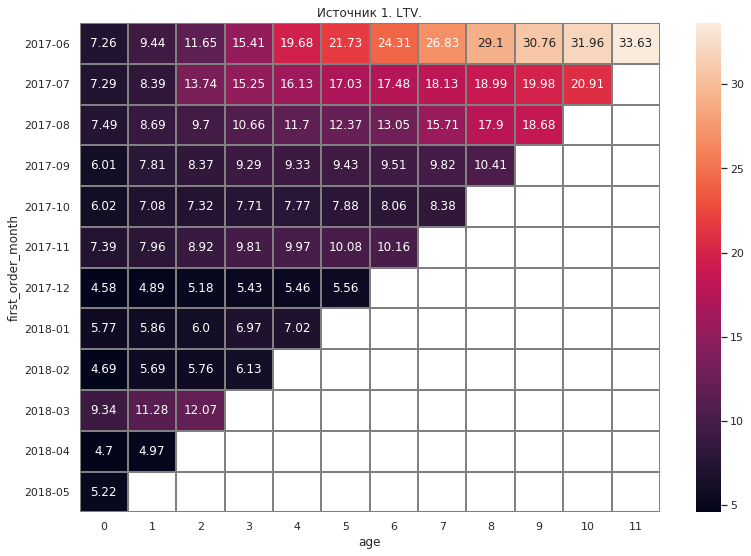

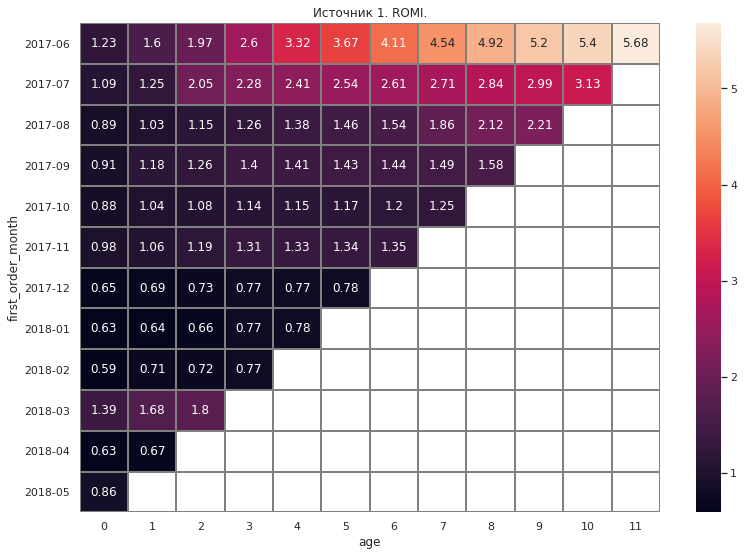

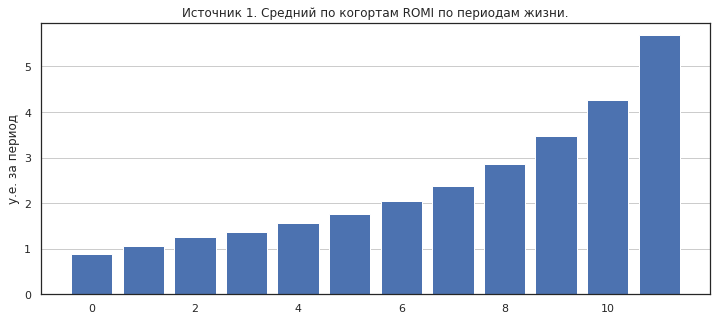

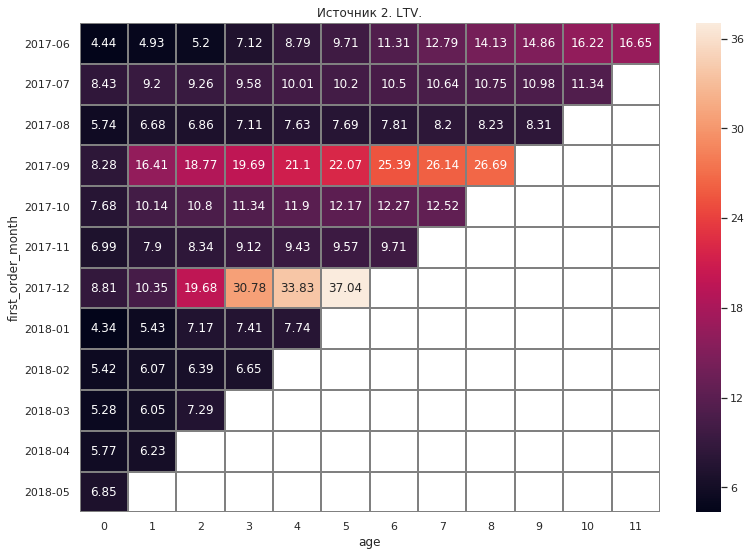

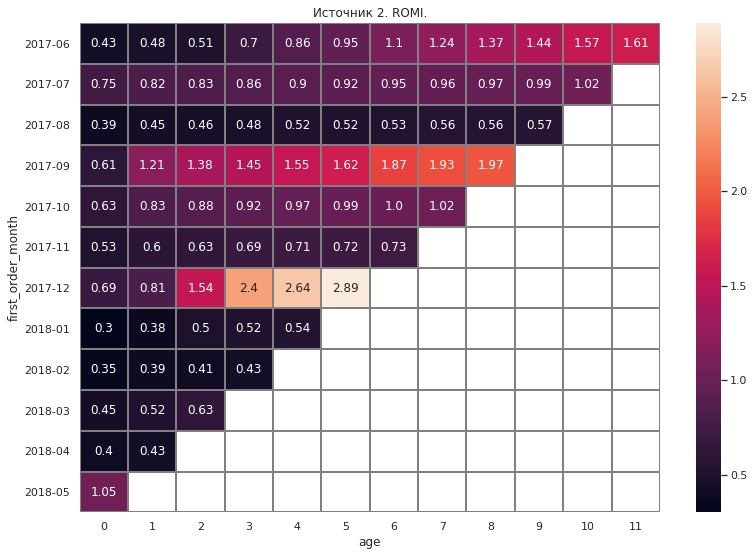

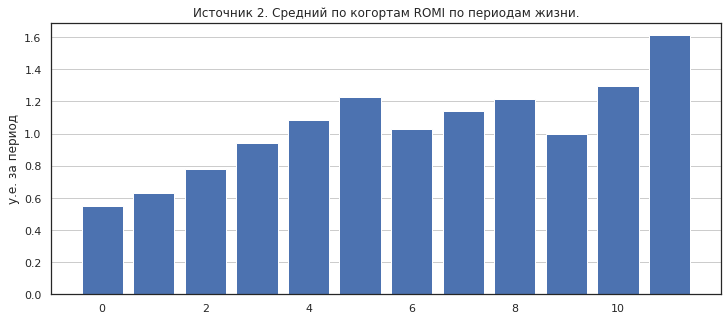

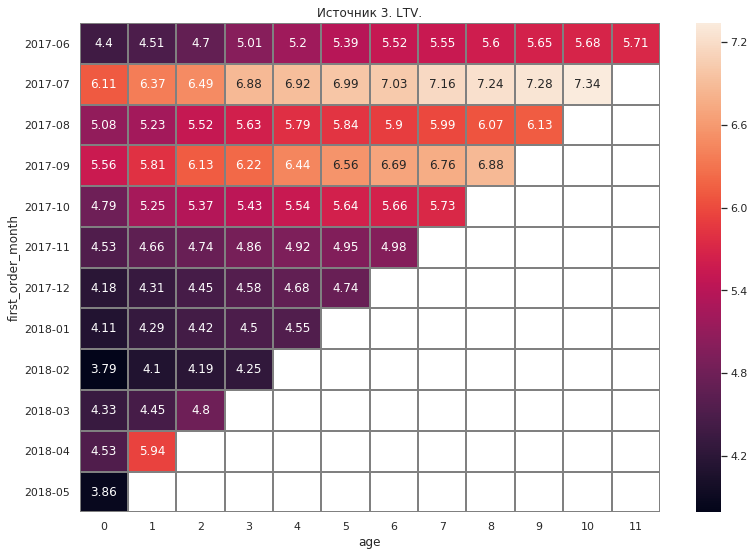

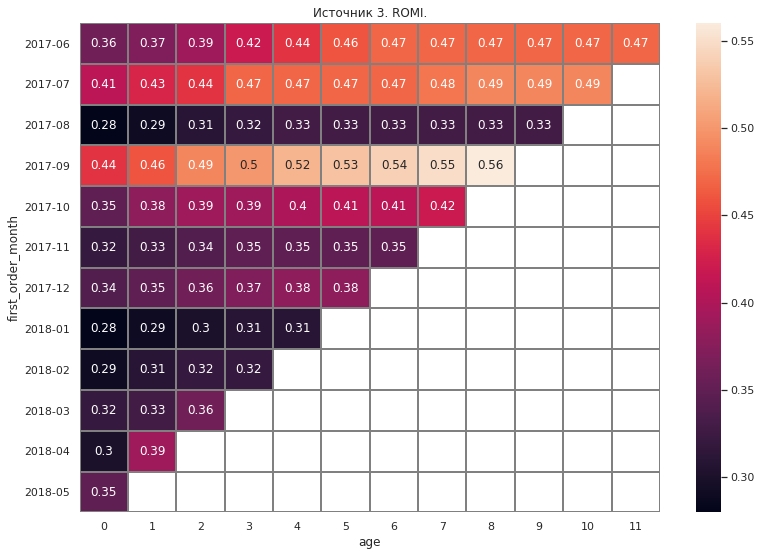

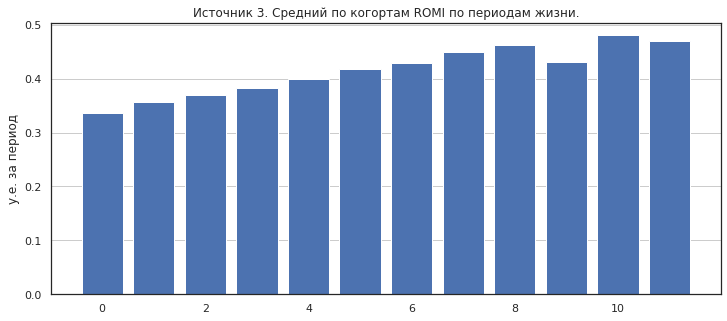

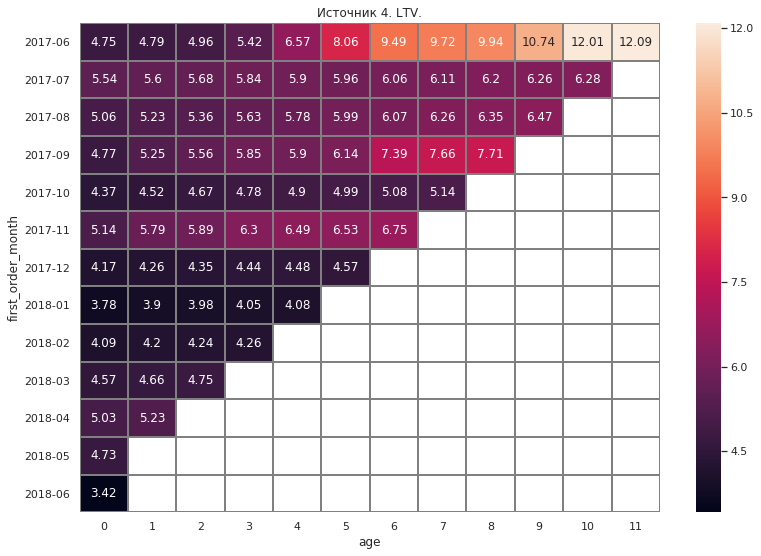

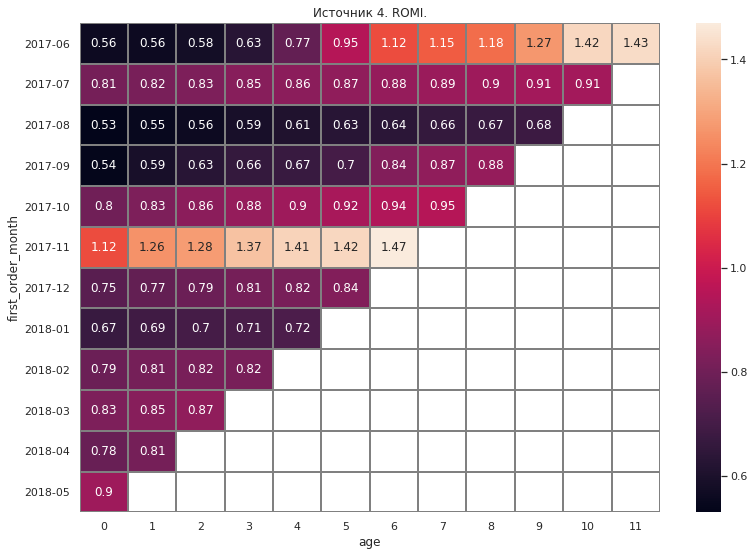

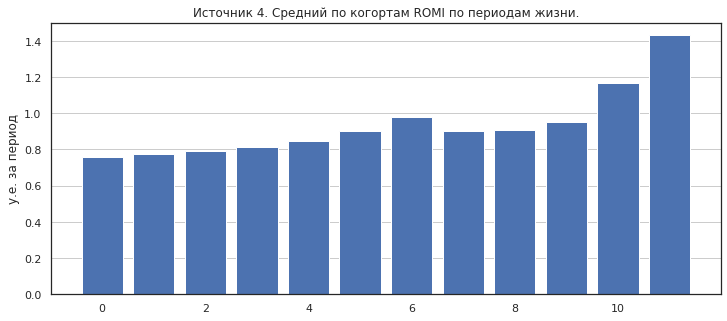

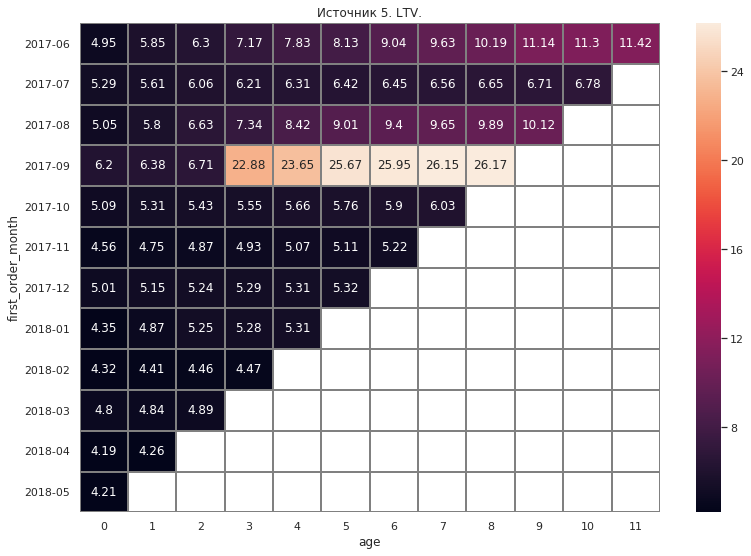

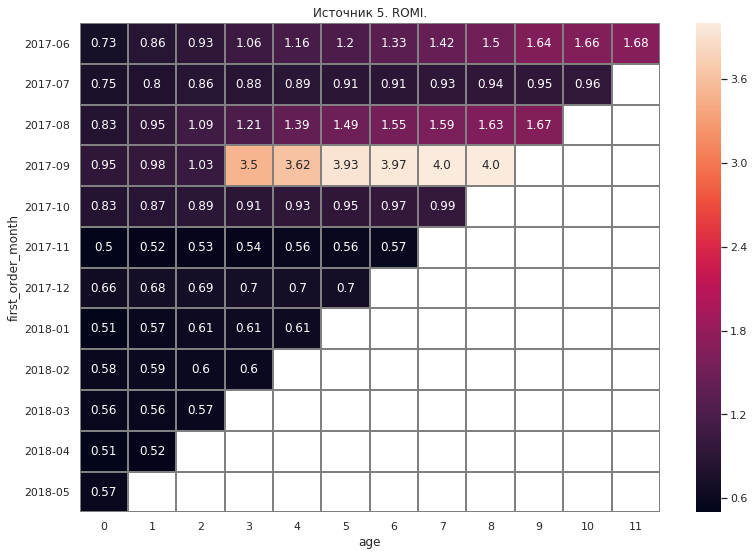

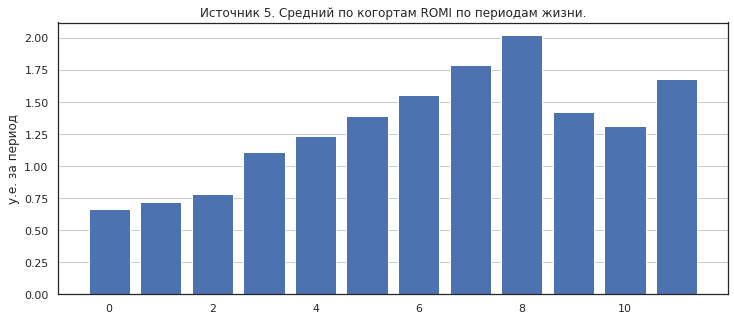

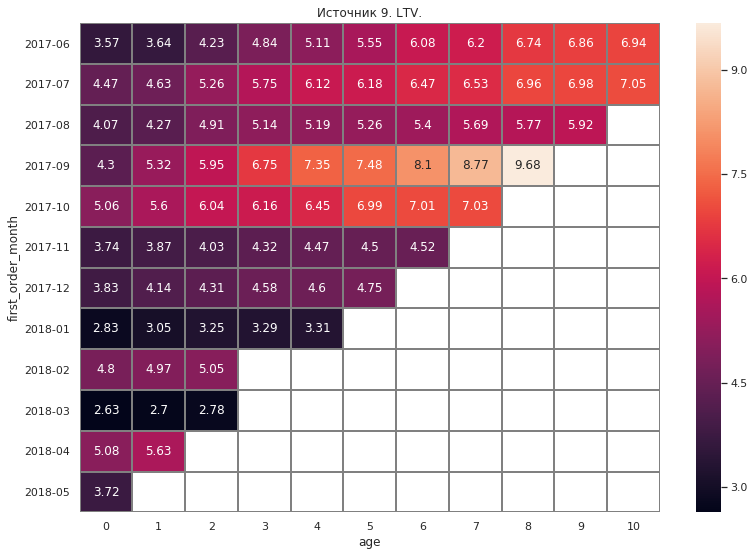

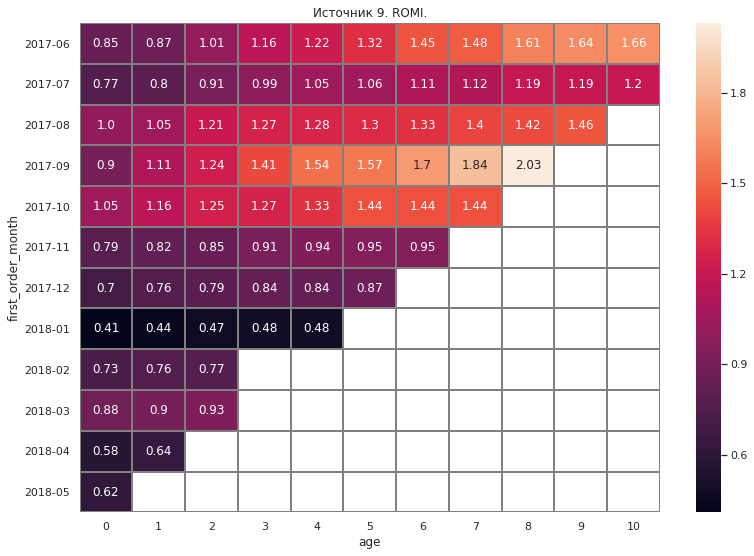

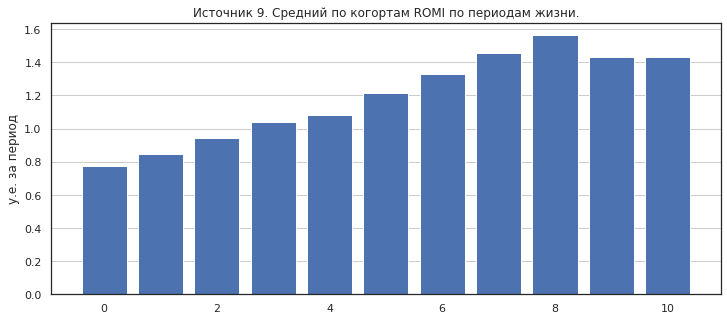

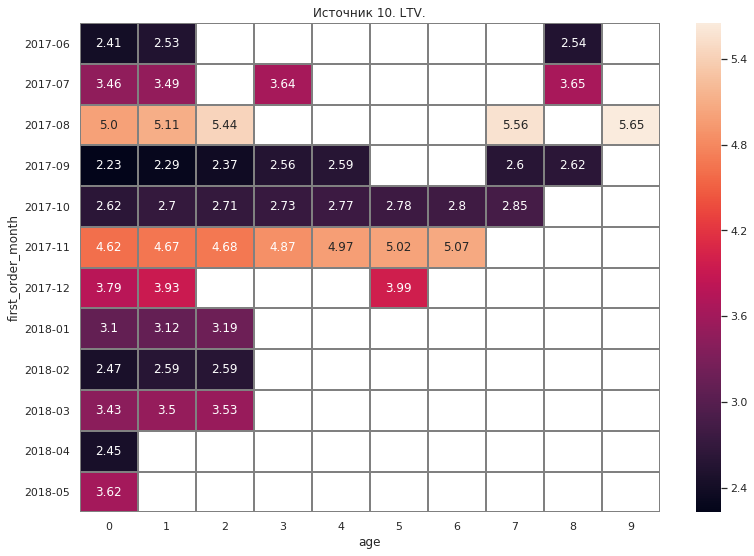

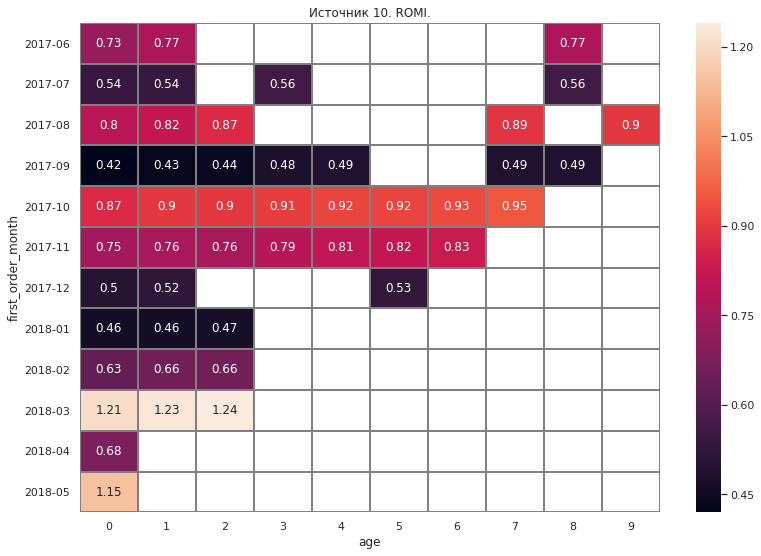

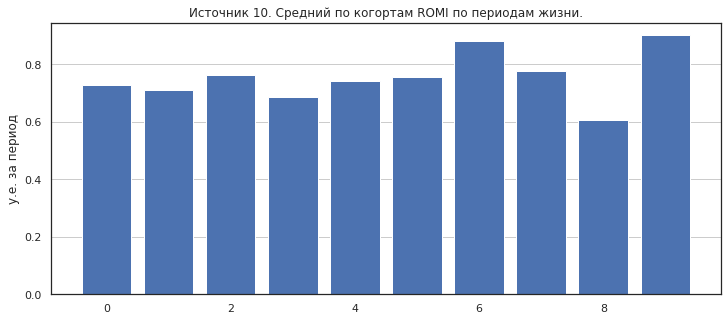

In [266]:
for cell in list_main:
    ltv_romi(orders_by_sources, costs_3, cell)
    

Лидер по инвестициям – источник 3 показывает самые худшие результаты. Он не окупается за все время анализа. Не окупается так же источник 10.

Лучшие показатели у источника 1 – ROMI больше 5,  LTV около 30. За ним, с большим отрывом следует источник 2 – ROMI около 1,6, LTV -  16. 

Т.е. можно решительно отказаться от источников 3 и 10,  перенаправить высвободившиеся средства в первую очередь на источник 1,  остатки на источник 2 и далее по снижению среднего ROMI.

По всем источникам лучшие показатели демонстрируют когорты июля – сентября 2017 года.  Причина требует дополнительного изучения.  Может там тоже есть возможности для роста. 


Так же вынужден отметить очень странную тепловую карту ROMI и LTV по источнику 10.

Долго разбирался и пришел с выводу что это не результат ошибки, а просто отражение факта, что по этому источнику для всех когорт в некоторые периоды жизни заказы не производились ( соответственно в pivote table в отдельных клетках появились NaN). 
Думаю, что это сочетание малых значений по продажам по этому источнику ( меньше всего инвестировали средства) и искажающий эффект от применения метода first при группировке ( хотя по бизнесу он очень  логичный).

Наверное можно было заменить Nan на нули перед  применением метода cumsum,  и все бы вышло красиво. Но это бы могло скрыть факт. 


### Маркетинговые метрики - выводы

1.	проект – убыточный. За анализируемый период расходы на рекламу превысили валовую прибыль на ~ 30%.;
2.	с самого начала 2018 года расходы на маркетинг снижали, наверное, пытались сократить убытки;
3.	основное направление расходов  ( ~ 40%) на рекламу – источник 3. За ним с большим отрывом следуют источники 4 и 5. На источники 6,7,8  средства не направлялись;
4.	когда начали снижать маркетинговые расходы, делали это примерно равномерно по всем источникам;
5.	средний CAC  больше среднего LTV,  что еще раз подтверждает убыточность проекта.  В 2018 году CAC пытались снижать, но даже в удачные месяцы заметно меньше LTV он не стал. Т.е. стратегия снижения расходов на маркетинг не очень работала;
6.	расчет CAC по источникам трафика показал, что наибольший он по источнику 3 . Именно туда направлялись основные инвестиции. Это поднимает вопрос о эффективности источника;
7.	расчет ROMI по источникам показал, что инвестиции в источник 3 и 10 не окупаются. Наибольшую отдачу дает источник 1. Затем, с большим отрывом, источник 2;
8.	из когорт, по своей доходности заметно выделяются когорты июня – сентября 2017. Надо провести  дополнительное исследование и понять как удалось получить таких клиентов. 

 









## Общие выводы 


После выгрузки данных, они были подвергнуты предварительному анализу.
 По его итогам были определены мероприятия по их предобработке.

Датасет  visits
1.	все столбцы с заглавными буквами, надо перевести в строчные;
2.	'End Ts', 'Source Id', 'Start Ts' - состоят из двух отдельных слов, надо объединить в одно;
3.	'End Ts', 'Start Ts' - привести к типу datetime.

Датасет orders 
1.	все столбцы с заглавными буквами, надо перевести в строчные;
2.	'Buy Ts' - состоит из двух отдельных слов, надо объединить в одно;
3.	'Buy Ts' - привести к типу datetime.

Датасет costs - dt привести к типу datetime



Далее рассчитывались метрики продуктовые, электронной коммерции, маркетинговые. 






Их анализ привел к следующим выводам.


Бизнес – ситуация заключается в том,  что:
1.	по итогам рассматриваемого периода проект оказался убыточным. Расходы на рекламу на ~ 30% превысили валовую прибыль;
2.	снижение рекламного бюджета ситуацию не  исправило – стали снижаться продажи и, в опережающем темпе, валовый доход.


Отрицательный эффект от снижения рекламного бюджета во многом связан с моделью поведения покупателей:
1.	люди первый раз заходят на сайт;
2.	очень быстро делают первую покупку (минуты);
3.	малая часть  ( ~5%) из них делает вторую покупку, и только через несколько месяцев.


Люди должны прийти на сайт чтобы купить, а для этого нужна реклама.


Т.е.  наблюдается признак т.н. “патовой ситуации”:
1.	нет рекламы – нет продаж – есть убытки;
2.	есть реклама – есть убытки.


Это не очень выглядит как бизнес. 


Альтернативой закрытию проекта могло бы быть повышение эффективности рекламы (тратим столько же, но покупателей приходит больше. и они больше и чаще покупают).


Шансы на нахождения такого решения есть:
1.	рекламный бюджет распределен неравномерно по источникам трафика ( лидер – источник 3, ~ 45% общего бюджета)
2.	расчеты CAC по источника трафика показали, что у источника 3 как раз самый высокий показатель 
3.	предпринятые попытки оптимизации рекламного бюджет не предполагали перераспределения. Все резали примерно равномерно. 


Для прояснения ситуации были рассчитаны ROMI по всем источникам и когортам. 


Было установлено:
1.	источники 3 и 10 не эффективны/ не окупаются. Т.е. , с учетом размеров инвестиций в источник 3, он и является причиной убытков;
2.	источник 1 показывает очень высокую эффективность. За ним, с большим отрывом следует источник 2.;
3.	когорты июня – сентября 2017 года приносили заметно больше денег.  


Рекомендации:
1.	проект пока не закрывать;
2.	не снижать рекламный бюджет;
3.	рекламный бюджет переориентировать на источник 1, по остаточному принципу – источник 2;
4.	провести дополнительное исследование по клиентам когорт июня-сентября 2017. Как их заполучили, что еще им продать, как еще таких заполучить. 

















